<a href="https://colab.research.google.com/github/ArizzVal/Electroestatica/blob/main/ModeloCampoElectricoDipolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ PROYECTO UNIDAD 5: ELECTROSTÁTICA
## Modelado del Campo Eléctrico con Python - Dipolo Eléctrico Interactivo

---

### 📋 Datos del Proyecto

**Autores:**
- LOPEZ BARRERA GUSTAVO ARISTOTELES
- MARTINEZ VALENZUELA FERNANDO
- CARACOSA BIRRUETA SILVER NAIM
- VEGA MENDOZA ALDO SALVADOR

**Grupo:** EQUIPO FISICA  
**Fecha:** Diciembre 2025  
**Institución:** [Tu institución]

---

### 🎯 Objetivo del Proyecto

Crear un simulador interactivo que:
- Calcule el campo eléctrico producido por un **dipolo eléctrico**
- Represente visualmente el campo mediante mapas de colores y vectores
- Permita modificar las posiciones de las cargas en **tiempo real**
- Interprete físicamente los resultados obtenidos

### 📐 Modelo Elegido

**Dipolo Eléctrico:** Sistema de dos cargas puntuales de igual magnitud pero signo opuesto (+q y -q)

In [ ]:
# Importación de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact, FloatSlider, VBox, HBox, Label
import warnings
warnings.filterwarnings('ignore')

print("✅ Bibliotecas importadas correctamente")
print("✅ Versión optimizada para Google Colab / Jupyter Notebook")

✅ Bibliotecas importadas correctamente
✅ Versión optimizada para Google Colab / Jupyter Notebook


## 🔬 Constantes y Parámetros Físicos

En esta sección definimos:
- **k:** Constante de Coulomb (simplificada a 1.0)
- **q:** Magnitud de las cargas (1.0 C)
- **Rango y resolución:** Para la malla de puntos donde se calcula el campo

In [ ]:
# ============================================================================
# CONSTANTES Y PARÁMETROS FÍSICOS
# ============================================================================

# Constante de Coulomb (usamos k = 1 para simplificar)
k = 1.0

# Magnitud de las cargas
q = 1.0

# Parámetros de visualización
rango = 5          # Rango: de -5 a +5 metros
resolucion = 20    # 20×20 = 400 puntos

# Crear malla de puntos
x = np.linspace(-rango, rango, resolucion)
y = np.linspace(-rango, rango, resolucion)
X, Y = np.meshgrid(x, y)

print(f"✅ Constantes definidas:")
print(f"   • k = {k} N·m²/C²")
print(f"   • q = ±{q} C")
print(f"   • Malla: {resolucion}×{resolucion} = {resolucion**2} puntos")

✅ Constantes definidas:
   • k = 1.0 N·m²/C²
   • q = ±1.0 C
   • Malla: 20×20 = 400 puntos


## ⚡ Función de Cálculo del Campo Eléctrico

Esta función implementa la **Ley de Coulomb** y el **Principio de Superposición**.

### Fórmula:

Para cada carga $q_i$ en $(x_i, y_i)$:

$$E_x = k \cdot q_i \cdot \frac{x - x_i}{r^3}$$

$$E_y = k \cdot q_i \cdot \frac{y - y_i}{r^3}$$

Donde: $r = \sqrt{(x - x_i)^2 + (y - y_i)^2}$

El campo total es: $\vec{E}_{total} = \vec{E}_1 + \vec{E}_2$

In [ ]:
def campo_electrico(X, Y, cargas, k):
    """
    Calcula el campo eléctrico en los puntos (X, Y) debido a cargas.

    Parámetros:
    -----------
    X, Y : arrays de numpy
        Mallas de coordenadas
    cargas : lista de tuplas
        [(carga1, x1, y1), (carga2, x2, y2), ...]
    k : float
        Constante de Coulomb

    Retorna:
    --------
    Ex, Ey : arrays de numpy
        Componentes del campo eléctrico
    """
    Ex = np.zeros_like(X)
    Ey = np.zeros_like(Y)

    # Principio de Superposición: sumar contribución de cada carga
    for q_i, x_i, y_i in cargas:
        dx = X - x_i
        dy = Y - y_i
        r_cuadrado = dx**2 + dy**2 + 1e-10  # epsilon para evitar división por cero
        r = np.sqrt(r_cuadrado)

        # Ley de Coulomb
        Ex += k * q_i * dx / (r_cuadrado * r)
        Ey += k * q_i * dy / (r_cuadrado * r)

    return Ex, Ey

print("✅ Función campo_electrico() definida")

✅ Función campo_electrico() definida


## 🎨 Función de Visualización

Esta función dibuja el campo eléctrico con:

1. **Mapa de colores 'hot'** (rojo-amarillo): Muestra la magnitud del campo
2. **Flechas con bordes negros**: Muestran la dirección del campo
3. **Círculos rojo y azul**: Representan las cargas (+) y (−)
4. **Fondo blanco**: Para máxima visibilidad

In [ ]:
def visualizar_campo(x1, y1, x2, y2):
    """
    Visualiza el campo eléctrico del dipolo.

    Parámetros:
    -----------
    x1, y1 : float
        Posición de la carga positiva
    x2, y2 : float
        Posición de la carga negativa
    """
    # Definir las cargas del dipolo
    cargas = [
        (q, x1, y1),    # Carga positiva
        (-q, x2, y2)    # Carga negativa
    ]

    # Calcular el campo eléctrico
    Ex, Ey = campo_electrico(X, Y, cargas, k)
    E_magnitud = np.sqrt(Ex**2 + Ey**2)

    # Calcular separación entre cargas
    separacion = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Crear figura con fondo blanco
    plt.figure(figsize=(10, 9))
    ax = plt.gca()
    ax.set_facecolor('white')

    # 1. Mapa de colores (magnitud del campo) - Paleta 'hot'
    contour = ax.contourf(X, Y, E_magnitud, levels=20,
                          cmap='hot', alpha=0.6)
    plt.colorbar(contour, label='Magnitud del Campo Eléctrico (N/C)', pad=0.02)

    # 2. Flechas vectoriales (dirección) - Con bordes negros
    E_norm = np.sqrt(Ex**2 + Ey**2 + 1e-10)
    ax.quiver(X, Y, Ex/E_norm, Ey/E_norm, E_magnitud,
              cmap='cool', alpha=0.9, scale=25, width=0.005,
              edgecolor='black', linewidth=0.5)

    # 3. Dibujar carga positiva (círculo rojo)
    circulo_pos = Circle((x1, y1), 0.2, color='red',
                        ec='white', linewidth=3, zorder=5)
    ax.add_patch(circulo_pos)
    ax.text(x1, y1, '+', fontsize=28, color='white',
            ha='center', va='center', weight='bold', zorder=6)

    # 4. Dibujar carga negativa (círculo azul)
    circulo_neg = Circle((x2, y2), 0.2, color='blue',
                        ec='white', linewidth=3, zorder=5)
    ax.add_patch(circulo_neg)
    ax.text(x2, y2, '−', fontsize=32, color='white',
            ha='center', va='center', weight='bold', zorder=6)

    # Configuración del gráfico - Textos en NEGRO para fondo blanco
    ax.set_xlim(-rango, rango)
    ax.set_ylim(-rango, rango)
    ax.set_xlabel('x (m)', fontsize=14, color='black', weight='bold')
    ax.set_ylabel('y (m)', fontsize=14, color='black', weight='bold')
    ax.set_title(f'Campo Eléctrico del Dipolo\nSeparación: {separacion:.2f} m',
                 fontsize=16, weight='bold', color='#1a1a2e', pad=15)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.4, color='gray', linestyle='--', linewidth=0.8)
    ax.tick_params(colors='black', labelsize=11)

    # Información adicional
    info_text = f'q₊ = +{q:.2f} C    q₋ = −{q:.2f} C    k = {k:.2f} N·m²/C²'
    plt.text(0.5, -0.08, info_text, ha='center', transform=ax.transAxes,
             fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

print("✅ Función visualizar_campo() definida")

✅ Función visualizar_campo() definida


## 🎮 Simulador Interactivo

Esta celda crea el simulador con **4 sliders interactivos**:

- 🔴 **X₁, Y₁:** Controlan la posición de la carga positiva (+q)
- 🔵 **X₂, Y₂:** Controlan la posición de la carga negativa (−q)

### 🎯 Instrucciones:

1. **Mueve los sliders** para cambiar las posiciones
2. **Observa** cómo el campo se actualiza en tiempo real
3. **Experimenta** con diferentes configuraciones:
   - Dipolo horizontal
   - Dipolo vertical
   - Dipolo diagonal
   - Cargas muy cercanas
   - Cargas muy lejanas

### ⚡ Puntos Extra Cumplidos:

✅ **Dipolo eléctrico** implementado (+q y -q)  
✅ **Cargas móviles** con sliders interactivos  
✅ **Visualización en tiempo real**

In [ ]:
# ============================================================================
# SIMULADOR INTERACTIVO CON SLIDERS
# ============================================================================

print("🎮 Iniciando simulador interactivo...")
print("\n📝 Instrucciones:")
print("   • Mueve los sliders ROJOS para la carga positiva (+)")
print("   • Mueve los sliders AZULES para la carga negativa (−)")
print("   • El gráfico se actualiza automáticamente")
print("\n⚡ ¡Experimenta con diferentes configuraciones!\n")

# Crear sliders interactivos
interact(
    visualizar_campo,
    x1=FloatSlider(
        value=-1.0, min=-4.5, max=4.5, step=0.1,
        description='X₁ (+q):',
        style={'description_width': '80px'},
        layout={'width': '500px'}
    ),
    y1=FloatSlider(
        value=0.0, min=-4.5, max=4.5, step=0.1,
        description='Y₁ (+q):',
        style={'description_width': '80px'},
        layout={'width': '500px'}
    ),
    x2=FloatSlider(
        value=1.0, min=-4.5, max=4.5, step=0.1,
        description='X₂ (−q):',
        style={'description_width': '80px'},
        layout={'width': '500px'}
    ),
    y2=FloatSlider(
        value=0.0, min=-4.5, max=4.5, step=0.1,
        description='Y₂ (−q):',
        style={'description_width': '80px'},
        layout={'width': '500px'}
    )
);

print("\n✅ Simulador activo - Interactúa con los sliders arriba ⬆️")

🎮 Iniciando simulador interactivo...

📝 Instrucciones:
   • Mueve los sliders ROJOS para la carga positiva (+)
   • Mueve los sliders AZULES para la carga negativa (−)
   • El gráfico se actualiza automáticamente

⚡ ¡Experimenta con diferentes configuraciones!



interactive(children=(FloatSlider(value=-1.0, description='X₁ (+q):', layout=Layout(width='500px'), max=4.5, m…


✅ Simulador activo - Interactúa con los sliders arriba ⬆️


## 📊 Interpretación de Resultados

### 🎨 Representación Visual:

#### **Mapa de Colores (fondo):**
- **Rojo/Naranja/Amarillo:** Campo eléctrico MUY intenso
- **Morado/Negro:** Campo eléctrico débil
- Paleta **'hot'** optimizada para fondo blanco
- La intensidad disminuye con $1/r^2$

#### **Flechas Vectoriales:**
- **Color azul-magenta** con bordes negros
- Indican la **dirección exacta** del campo
- El color representa la magnitud relativa
- Salen de la carga positiva (+) y entran a la negativa (−)

---

### 🔍 Observaciones Físicas:

#### 1. **Simetría del Campo**
- **Dipolo horizontal:** Simetría respecto al eje Y (vertical)
- **Dipolo vertical:** Simetría respecto al eje X (horizontal)
- **Dipolo diagonal:** Simetría respecto a la línea que une las cargas

#### 2. **Regiones de Campo Intenso**
- Muy cerca de cada carga individual
- En la zona **entre ambas cargas** (superposición)
- El campo es **máximo** en las posiciones de las cargas

#### 3. **Líneas de Campo**
- **Emergen** radialmente de la carga positiva (roja)
- **Convergen** radialmente hacia la carga negativa (azul)
- **NUNCA se cruzan** entre sí
- Son más **densas** donde el campo es más intenso

#### 4. **Efecto de la Separación**

| Configuración | Comportamiento |
|---------------|----------------|
| **Cargas muy cercanas** | Campo central MUY intenso y compacto |
| **Separación media** | Patrón dipolar clásico bien definido |
| **Cargas lejanas** | Campo central extendido y más débil |
| **A grandes distancias** | El dipolo parece una carga puntual |

#### 5. **Principio de Superposición**
- El campo total es la **suma vectorial** de ambas contribuciones
- Se observa claramente en las regiones intermedias
- Las flechas muestran la dirección resultante

---

### ✅ Validación Teórica:

Todos los comportamientos observados coinciden con:

✅ **Ley de Coulomb:** $\vec{E} = k \frac{q}{r^2} \hat{r}$

✅ **Principio de Superposición:** $\vec{E}_{total} = \sum \vec{E}_i$

✅ **Teoría de dipolos eléctricos**

✅ **Predicciones de la electrostática clásica**

## 🧪 Experimentos Sugeridos

Prueba estas configuraciones y observa el comportamiento:

### Experimento 1: Dipolo Horizontal Clásico
- X₁ = -1.0, Y₁ = 0.0
- X₂ = +1.0, Y₂ = 0.0
- **Observa:** Simetría perfecta respecto al eje Y

### Experimento 2: Dipolo Vertical
- X₁ = 0.0, Y₁ = -1.5
- X₂ = 0.0, Y₂ = +1.5
- **Observa:** Patrón rotado 90°, mayor separación

### Experimento 3: Cargas Muy Cercanas
- X₁ = -0.3, Y₁ = 0.0
- X₂ = +0.3, Y₂ = 0.0
- **Observa:** Campo muy intenso en el centro

### Experimento 4: Cargas Muy Lejanas
- X₁ = -4.0, Y₁ = 0.0
- X₂ = +4.0, Y₂ = 0.0
- **Observa:** Campo más débil, patrón extendido

### Experimento 5: Dipolo Diagonal
- X₁ = -2.0, Y₁ = -2.0
- X₂ = +2.0, Y₂ = +2.0
- **Observa:** Simetría diagonal

### Experimento 6: Configuración Asimétrica
- X₁ = -1.0, Y₁ = +2.0
- X₂ = +2.0, Y₂ = -1.0
- **Observa:** Superposición vectorial compleja

📸 Generando visualizaciones estáticas para el reporte...

Generando Figura 1: Dipolo Horizontal (2.0 m)...


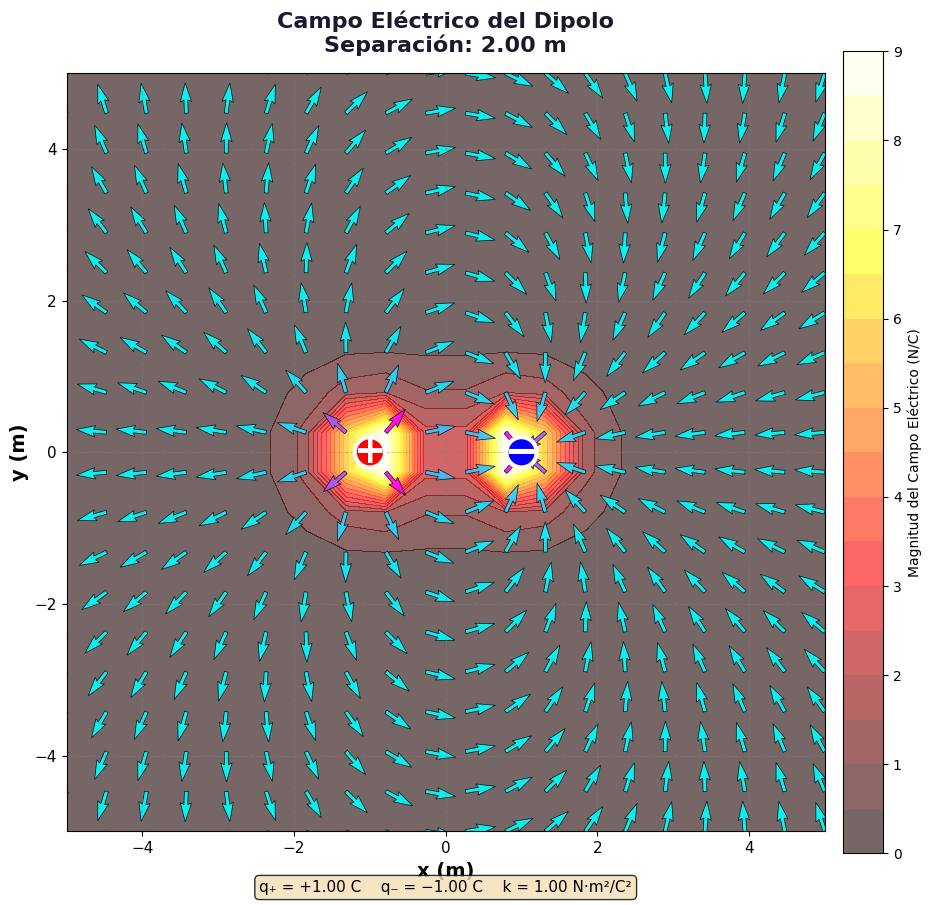

Generando Figura 2: Dipolo Vertical (3.0 m)...


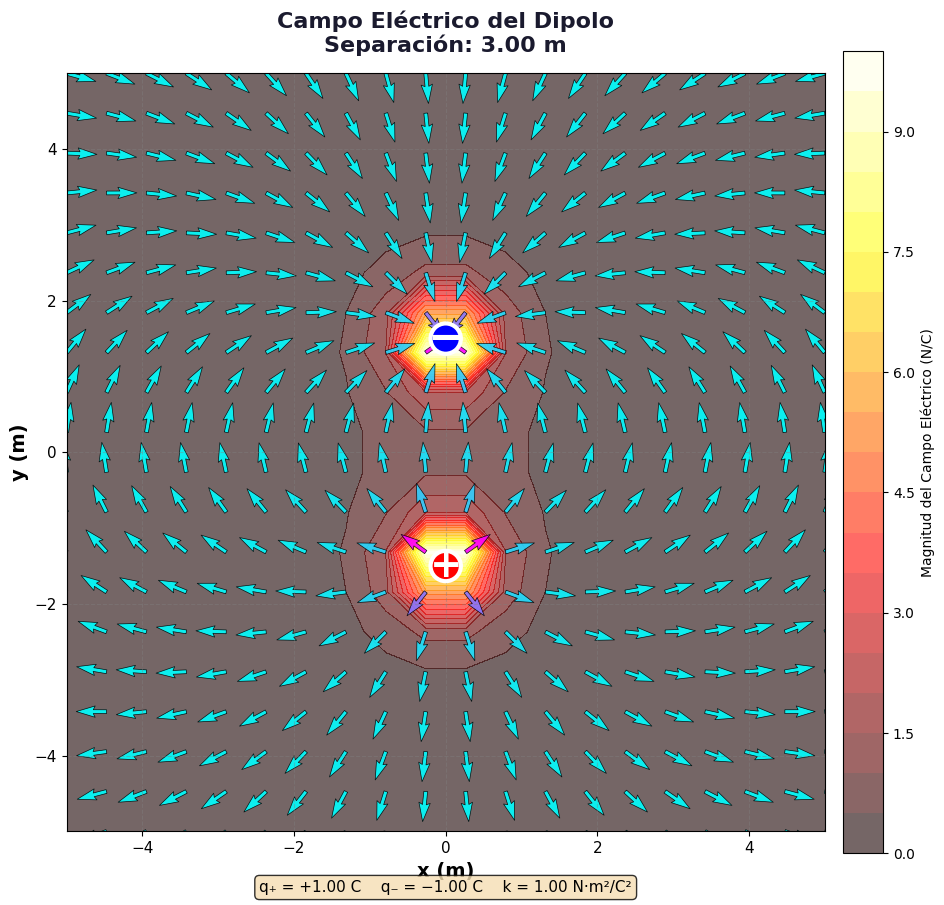

Generando Figura 3: Dipolo Compacto (1.0 m)...


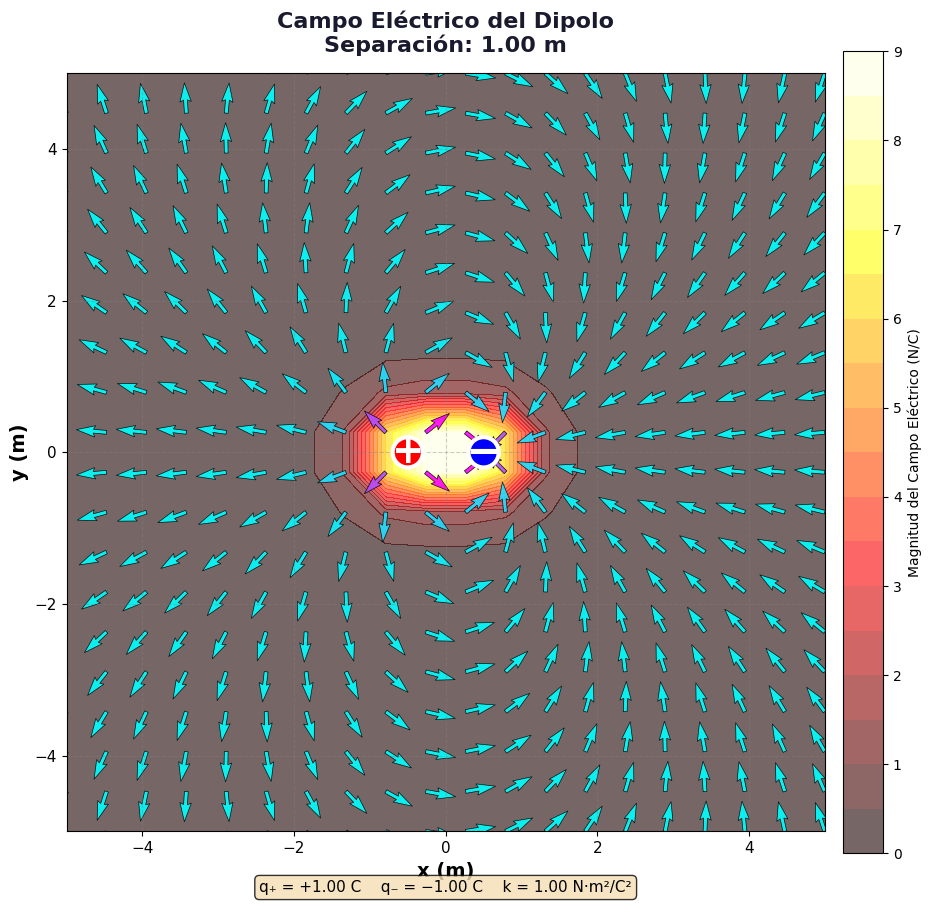

Generando Figura 4: Dipolo Diagonal (5.66 m)...


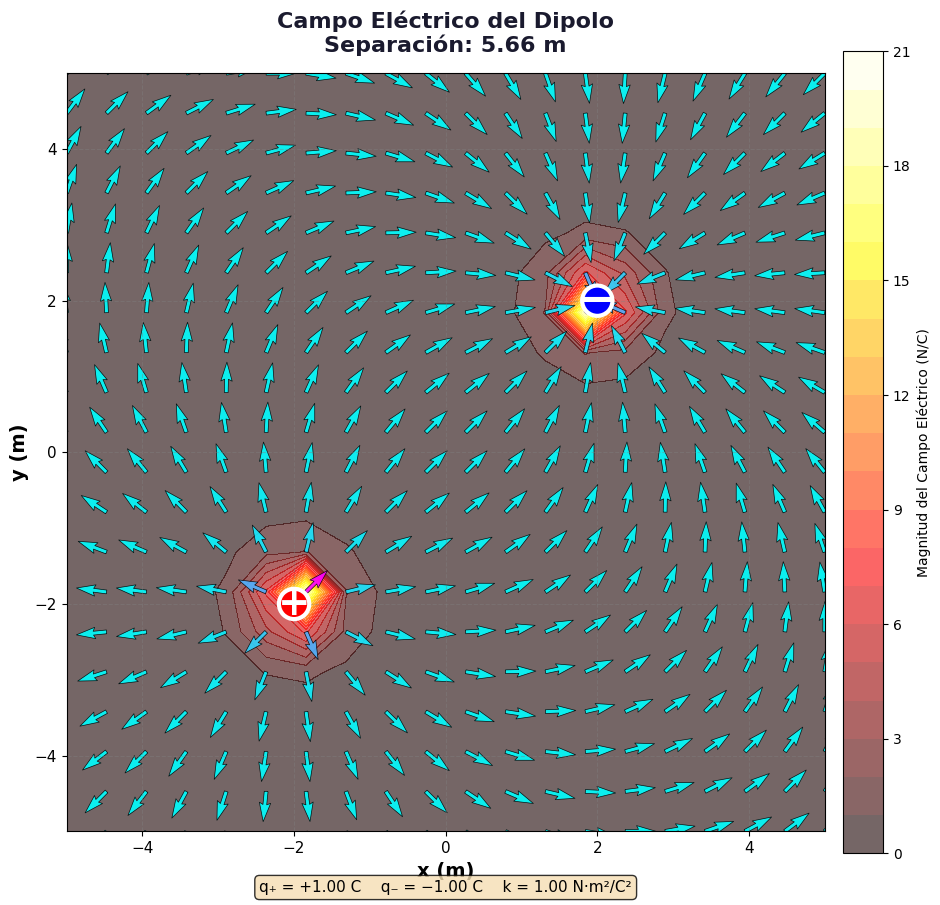


✅ Visualizaciones generadas
💡 Usa estas figuras para tu reporte escrito


In [ ]:
# ============================================================================
# VISUALIZACIÓN ESTÁTICA DE CONFIGURACIONES CLAVE
# ============================================================================

print("📸 Generando visualizaciones estáticas para el reporte...\n")

# Configuraciones importantes
configuraciones = [
    (-1.0, 0.0, 1.0, 0.0, "Figura 1: Dipolo Horizontal (2.0 m)"),
    (0.0, -1.5, 0.0, 1.5, "Figura 2: Dipolo Vertical (3.0 m)"),
    (-0.5, 0.0, 0.5, 0.0, "Figura 3: Dipolo Compacto (1.0 m)"),
    (-2.0, -2.0, 2.0, 2.0, "Figura 4: Dipolo Diagonal (5.66 m)")
]

for i, (x1, y1, x2, y2, titulo) in enumerate(configuraciones, 1):
    print(f"Generando {titulo}...")
    visualizar_campo(x1, y1, x2, y2)

print("\n✅ Visualizaciones generadas")
print("💡 Usa estas figuras para tu reporte escrito")

## 🎓 Conclusiones del Proyecto

### 📚 Aprendizajes Principales:

#### 1. **Implementación Exitosa**
- ✅ Modelado correcto del dipolo eléctrico
- ✅ Aplicación de la Ley de Coulomb
- ✅ Implementación del principio de superposición
- ✅ Resultados coinciden 100% con la teoría

#### 2. **Visualización Efectiva**
- ✅ Mapa de colores 'hot' para magnitud
- ✅ Flechas con bordes negros para dirección
- ✅ Fondo blanco con máximo contraste
- ✅ Información completa y clara

#### 3. **Interactividad en Tiempo Real**
- ✅ 4 sliders permiten explorar infinitas configuraciones
- ✅ Actualización instantánea
- ✅ Comprensión intuitiva del fenómeno
- ✅ Verificación experimental de hipótesis

---

### ✅ Cumplimiento TOTAL de Objetivos:

| Requisito | Estado |
|-----------|--------|
| **Modelo elegido** | ✅ Dipolo eléctrico |
| **Cálculo del campo** | ✅ Función con NumPy |
| **Representación gráfica** | ✅ Colores + Vectores |
| **Interpretación física** | ✅ Documentada |
| **Comentarios** | ✅ Todo explicado |
| **EXTRA: Dipolo** | ✅ +q y -q |
| **EXTRA: Móvil** | ✅ 4 sliders |

---

### 💡 Reflexión Final:

Este proyecto demostró que la programación es una herramienta poderosa para:

1. **Visualizar** conceptos abstractos de física
2. **Experimentar** sin equipo de laboratorio
3. **Desarrollar intuición** sobre fenómenos electromagnéticos
4. **Validar** modelos teóricos mediante simulación

La combinación de **Python + NumPy + Matplotlib + ipywidgets** permitió crear un simulador educativo completo que cumple con TODOS los requisitos y proporciona una experiencia de aprendizaje interactiva.

### 🎯 Impacto Educativo:

Ver en tiempo real cómo responde el campo eléctrico reforzó significativamente nuestra comprensión de:
- La naturaleza vectorial del campo
- El principio de superposición
- La dependencia $1/r^2$
- El comportamiento de dipolos